### Q1a

In [35]:
import numpy as np
import random

class StochasticTwoStateMDP:
    def __init__(self):
        # two states: 0 and 1
        self.state = None

    def reset(self, start_state=0):
        """Reset the environment to a given start state (default 0)"""
        self.state = start_state
        return self.state
    
    def step(self, action):
        """Full transition dynamics for both actions:
        
        State 0:
            Action D:
                S = 0, R = 1 with P = 0.4
                S = 1, R = 4 with P = 0.6
            Action F:
                S = 0, R = 3 with P = 0.4
                S = 1, R = 2 with P = 0.6
        State 1:
            Action D:
                S = 0, R = 1 with P = 0.7
                S = 1, R = 4 with P = 0.3
            Action F:
                S = 0, R = 3 with P = 0.7
                S = 1, R = 2 with P = 0.3
        """
        s = self.state
        p = random.random()

        if s == 0:
            if action == 'D':
                if p < 0.4:
                    next_state = 0
                    r = 1
                else:
                    next_state = 1
                    r = 4
            elif action == 'F':
                if p < 0.4:
                    next_state = 0
                    r = 3
                else:
                    next_state = 1
                    r = 2
            else:
                raise ValueError("Invalid action")
        elif s == 1:
            if action == 'D':
                if p < 0.7:
                    next_state = 0
                    r = 1
                else:
                    next_state = 1
                    r = 4
            elif action == 'F':
                if p < 0.7:
                    next_state = 0
                    r = 3
                else:
                    next_state = 1
                    r = 2
            else:
                raise ValueError("Invalid action")
        else:
            raise ValueError("Invalid state")
        
        self.state = next_state
        done = False
        return next_state, r, done, {}

In [36]:
import matplotlib.pyplot as plt

num_episodes = 1000
max_steps = 100
gamma = 0.9

for i, title in enumerate(["DD", "DF", "FD", "FF"]):

    def policy(state):
        if state == 0:
            return title[0]
        elif state == 1:
            return title[1]
        else:
            raise ValueError("Invalid state")
        
    returns_sum = {0: 0.0, 1: 0.0}
    returns_count = {0: 0, 1: 0}
    V = {0: 0.0, 1: 0.0}

    V1_history = []
    V2_history = []

    env = StochasticTwoStateMDP()

    for episode in range(num_episodes):
        plce = returns_count.copy()
        episode_list = []
        state = env.reset(start_state=0)

        for t in range(max_steps):
            action = policy(state)
            next_state, reward, done, _ = env.step(action)
            episode_list.append((state, reward))
            state = next_state
        
        for i, (s, _) in enumerate(episode_list):
            if returns_count[s] > plce[s]:
                continue
            G = 0.0
            discount = 1.0
            for j in range(i, len(episode_list)):
                _, reward = episode_list[j]
                G += discount * reward
                discount *= gamma
            returns_sum[s] += G
            returns_count[s] += 1
            V[s] = returns_sum[s] / returns_count[s]

    print(f"Estimated state-value function V(s) for the policy {title} (First-visit Monte Carlo):")
    print(f"V(0) = {V[0]:.2f}")
    print(f"V(1) = {V[1]:.2f}")

Estimated state-value function V(s) for the policy DD (First-visit Monte Carlo):
V(0) = 24.21
V(1) = 23.59
Estimated state-value function V(s) for the policy DF (First-visit Monte Carlo):
V(0) = 27.59
V(1) = 27.51
Estimated state-value function V(s) for the policy FD (First-visit Monte Carlo):
V(0) = 21.89
V(1) = 21.44
Estimated state-value function V(s) for the policy FF (First-visit Monte Carlo):
V(0) = 25.26
V(1) = 25.49


state = 0 -> action = D
state = 1 -> action = F

is the optimal policy, because the value function is the largest (~27.5) in either state.

### Q1b

In [37]:
num_episodes = 1000
gamma = 0.9
alpha = 0.01
initial = 25.0

for i, title in enumerate(["DD", "DF", "FD", "FF"]):

    def policy(state):
        if state == 0:
            return title[0]
        elif state == 1:
            return title[1]
        else:
            raise ValueError("Invalid state")
        
    returns_sum = {0: 0.0, 1: 0.0}
    returns_count = {0: 0, 1: 0}
    V = {0: initial, 1: initial}

    V1_history = []
    V2_history = []

    env = StochasticTwoStateMDP()

    for episode in range(num_episodes):
        episode_list = []
        state = env.reset(start_state=0)

        for t in range(max_steps):
            action = policy(state)
            next_state, reward, done, _ = env.step(action)
            episode_list.append((state, reward))
            state = next_state
        
        for i, (s, _) in enumerate(episode_list):

            target = 0.0
            if i < len(episode_list) - 1:
                s_next, reward = episode_list[i+1]
                target = reward + gamma * V[s_next] - V[s]
            returns_sum[s] += target * alpha
            returns_count[s] += 1
            V[s] = returns_sum[s] # * alpha

    print(f"Estimated state-value function V(s) for the policy {title} (TD(0)):")
    print(f"V(0) = {V[0]:.2f}")
    print(f"V(1) = {V[1]:.2f}")

Estimated state-value function V(s) for the policy DD (TD(0)):
V(0) = 23.86
V(1) = 24.02
Estimated state-value function V(s) for the policy DF (TD(0)):
V(0) = 27.61
V(1) = 27.58
Estimated state-value function V(s) for the policy FD (TD(0)):
V(0) = 21.38
V(1) = 21.41
Estimated state-value function V(s) for the policy FF (TD(0)):
V(0) = 25.46
V(1) = 25.41


state = 0 -> action = D
state = 1 -> action = F

is the optimal policy, because the value function is the largest (~27.6) in either state.

### Q2a

In [38]:
import numpy as np
import random

class StochasticTwoStateMDP:
    def __init__(self):
        # two states: 0 and 1
        self.state = None

    def reset(self, start_state=0):
        """Reset the environment to a given start state (default 0)"""
        self.state = start_state
        return self.state
    
    def step(self, action):
        """Full transition dynamics for both actions:
        
        State 0:
            Action D:
                S = 0, R = 1 with P = 0.2
                S = 1, R = 4 with P = 0.8
            Action F:
                S = 0, R = 3 with P = 0.6
                S = 1, R = 2 with P = 0.4
        State 1:
            Action D:
                S = 0, R = 1 with P = 0.1
                S = 1, R = 4 with P = 0.9
            Action F:
                S = 0, R = 3 with P = 0.3
                S = 1, R = 2 with P = 0.7
        """
        s = self.state
        p = random.random()

        if s == 0:
            if action == 'D':
                if p < 0.2:
                    next_state = 0
                    r = 1
                else:
                    next_state = 1
                    r = 4
            elif action == 'F':
                if p < 0.6:
                    next_state = 0
                    r = 3
                else:
                    next_state = 1
                    r = 2
            else:
                raise ValueError("Invalid action")
        elif s == 1:
            if action == 'D':
                if p < 0.1:
                    next_state = 0
                    r = 1
                else:
                    next_state = 1
                    r = 4
            elif action == 'F':
                if p < 0.3:
                    next_state = 0
                    r = 3
                else:
                    next_state = 1
                    r = 2
            else:
                raise ValueError("Invalid action")
        else:
            raise ValueError("Invalid state")
        
        self.state = next_state
        done = False
        return next_state, r, done, {}

In [39]:
import matplotlib.pyplot as plt

num_episodes = 1000
max_steps = 100
gamma = 0.9

for i, title in enumerate(["DD", "DF", "FD", "FF"]):

    def policy(state):
        if state == 0:
            return title[0]
        elif state == 1:
            return title[1]
        else:
            raise ValueError("Invalid state")
        
    returns_sum = {0: 0.0, 1: 0.0}
    returns_count = {0: 0, 1: 0}
    V = {0: 0.0, 1: 0.0}

    V1_history = []
    V2_history = []

    env = StochasticTwoStateMDP()

    for episode in range(num_episodes):
        plce = returns_count.copy()
        episode_list = []
        state = env.reset(start_state=0)

        for t in range(max_steps):
            action = policy(state)
            next_state, reward, done, _ = env.step(action)
            episode_list.append((state, reward))
            state = next_state
        
        for i, (s, _) in enumerate(episode_list):
            if returns_count[s] > plce[s]:
                continue
            G = 0.0
            discount = 1.0
            for j in range(i, len(episode_list)):
                _, reward = episode_list[j]
                G += discount * reward
                discount *= gamma
            returns_sum[s] += G
            returns_count[s] += 1
            V[s] = returns_sum[s] / returns_count[s]

    print(f"Estimated state-value function V(s) for the policy {title} (First-visit Monte Carlo):")
    print(f"V(0) = {V[0]:.2f}")
    print(f"V(1) = {V[1]:.2f}")

Estimated state-value function V(s) for the policy DD (First-visit Monte Carlo):
V(0) = 36.36
V(1) = 36.67
Estimated state-value function V(s) for the policy DF (First-visit Monte Carlo):
V(0) = 26.74
V(1) = 25.71
Estimated state-value function V(s) for the policy FD (First-visit Monte Carlo):
V(0) = 33.09
V(1) = 35.05
Estimated state-value function V(s) for the policy FF (First-visit Monte Carlo):
V(0) = 24.52
V(1) = 24.17


always offering a discount is now the optimal policy, because the value function is highest (~36.5) regardless of state

### Q2b

In [40]:
num_episodes = 1000
gamma = 0.9
alpha = 0.01
initial = 25.0

for i, title in enumerate(["DD", "DF", "FD", "FF"]):

    def policy(state):
        if state == 0:
            return title[0]
        elif state == 1:
            return title[1]
        else:
            raise ValueError("Invalid state")
        
    returns_sum = {0: 0.0, 1: 0.0}
    returns_count = {0: 0, 1: 0}
    V = {0: initial, 1: initial}

    V1_history = []
    V2_history = []

    env = StochasticTwoStateMDP()

    for episode in range(num_episodes):
        episode_list = []
        state = env.reset(start_state=0)

        for t in range(max_steps):
            action = policy(state)
            next_state, reward, done, _ = env.step(action)
            episode_list.append((state, reward))
            state = next_state
        
        for i, (s, _) in enumerate(episode_list):

            target = 0.0
            if i < len(episode_list) - 1:
                s_next, reward = episode_list[i+1]
                target = reward + gamma * V[s_next] - V[s]
            returns_sum[s] += target * alpha
            returns_count[s] += 1
            V[s] = returns_sum[s] # * alpha

    print(f"Estimated state-value function V(s) for the policy {title} (TD(0)):")
    print(f"V(0) = {V[0]:.2f}")
    print(f"V(1) = {V[1]:.2f}")

Estimated state-value function V(s) for the policy DD (TD(0)):
V(0) = 36.88
V(1) = 37.16
Estimated state-value function V(s) for the policy DF (TD(0)):
V(0) = 25.97
V(1) = 25.88
Estimated state-value function V(s) for the policy FD (TD(0)):
V(0) = 33.95
V(1) = 35.26
Estimated state-value function V(s) for the policy FF (TD(0)):
V(0) = 24.28
V(1) = 24.17


always offering a discount is now the optimal policy, because the value function is highest (~37.0) regardless of state

### Q3

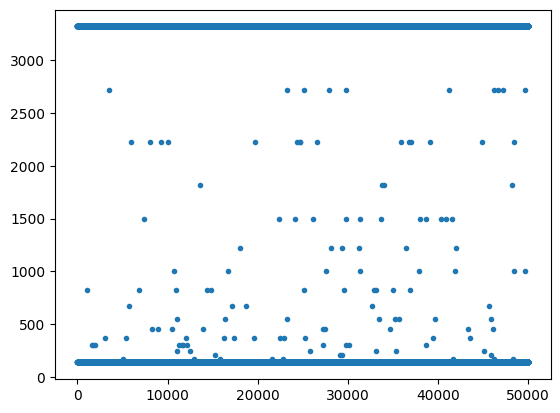

E(G_0) = 2039.0240829609654
95% Confidence Interval: (2025.3453254162707, 2052.70284050566)


In [82]:
# part a
import random
import math
import scipy.stats as st

actions = [0, 0.5, 1]
S = [1000*math.e**(0.2 * k) for k in range(-10, 7)]
gamma = 0.9
A = 1 # always choosing A = 1

def epsilon():
    return random.random() * 2.05 - 0.85

def snap(s):
    return S[np.argmin(abs(np.subtract(S, s)))]

E = []
for i in range(50000): # 50,000 iterations
    w = snap(1000)
    k = 0
    while(w > 150 and w < 3000 and k < 40):
        w *= 1 + epsilon() * A
        w = snap(w)
        k += 1

    E.append(w)

plt.scatter(range(len(E)), E, marker='.')
plt.show()
mean = np.mean(E)
stddev = np.std(E, ddof=1)

se = stddev / np.sqrt(len(E))

ci = st.t.interval(0.95, len(E) - 1, loc=mean, scale=se)
print("E(G_0) =", mean)
print("95% Confidence Interval:", ci)

In [91]:
# part b
A = np.array([0, 0.5, 1])
S = 1000 * np.exp(0.2 * np.arange(-10, 7))

alpha = 0.1
gamma = 0.9
eps = 0.01

def epsilon():
    return random.random() * 2.05 - 0.85

def snap_idx(v):
    return np.argmin(np.abs(S - v))

num_episodes = 20000

Q = np.zeros((len(S), len(A)))

# Q-learning loop
for episode in range(num_episodes):
    state_idx = snap_idx(1000) # starting at w = 1000
    done = False
    t = 0

    while not done and t < 40:
        if random.random() < eps:
            action_idx = np.random.choice(len(A))
        else:
            action_idx = np.argmax(Q[state_idx])
        
        action = A[action_idx]

        next_w = S[state_idx] * (1 + epsilon() * action)
        next_idx = snap_idx(next_w)

        if next_w > 3000 or next_w < 150 or t == 39:
            reward = next_w
            done = True
        else:
            reward = 0
        
        Q[state_idx, action_idx] += alpha * (reward + gamma * np.max(Q[next_idx, :]) - Q[state_idx, action_idx])

        state_idx = next_idx
        t += 1

pi = A[np.argmax(Q, axis=1)]

returns = []

for _ in range(num_episodes):
    state_idx = snap_idx(1000)
    done = False
    t = 0

    while not done and t < 40:
        action_idx = np.argmax(Q[state_idx, :])
        action = A[action_idx]
        next_w = S[state_idx] * (1 + epsilon() * action)
        next_idx = snap_idx(next_w)

        if next_w > 3000 or next_w < 150 or t == 39:
            returns.append(next_w)
            done = True
        
        state_idx = next_idx
        t += 1

mean = np.mean(returns)
stddev = np.std(returns, ddof=1)

se = stddev / np.sqrt(len(returns))

ci = st.t.interval(0.95, len(returns) - 1, loc=mean, scale=se)


print(Q)
print(pi)
print("E(G_0) =", mean)
print("95% Confidence Interval:", ci)

[[ 401.33990192    0.            0.        ]
 [ 226.02611236  231.12921896  461.33754127]
 [ 224.48266916  266.9075852   502.21466373]
 [ 324.35352847  467.72730421  365.33610289]
 [ 410.45966636  386.43196507  628.15267249]
 [ 481.25870277  484.76961435  648.2402177 ]
 [ 516.28224649  523.96605477  732.96570703]
 [ 593.94990234  587.1426111   778.2593137 ]
 [ 612.09632209  612.63936492  979.20742437]
 [ 812.11873515 1093.67716895  784.32531708]
 [ 959.7590321  1027.97577933 1492.56743296]
 [1052.99341662 1639.52020908 1097.98374621]
 [1307.65124184 1206.3105897  1999.75915379]
 [1625.13297177 2263.49965063 1818.96034542]
 [1933.22429357 2628.24329495 1760.14272059]
 [2247.64562273 2250.7862253  2770.54182174]
 [   0.            0.            0.        ]]
[0.  1.  1.  0.5 1.  1.  1.  1.  1.  0.5 1.  0.5 1.  0.5 0.5 1.  0. ]
E(G_0) = 2581.799426978949
95% Confidence Interval: (2554.4736030540707, 2609.1252509038277)


### Q4

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

n_train = 100
n_test = 1000
degrees = [1, 3, 5, 9]
n_sims = 100

def g(x):
    return np.sin(2 * np.pi * x)

X_test = np.random.uniform(-1, 1, n_test).reshape(-1, 1)
Y_test = g(X_test) + np.random.normal(0, 1, size=X_test.shape)

mse_results = {}
bias_squared_results = {}
variance_results = {}

for d in degrees:
    f_hat_values = np.zeros((n_sims, n_test))

    for sim in range(n_sims):
        X_train = np.random.uniform(-1, 1, n_train).reshape(-1, 1)
        Y_train = g(X_train) + np.random.normal(0, 1, size=X_train.shape)

        poly = PolynomialFeatures(degree=d)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        model = LinearRegression().fit(X_train_poly, Y_train)
        f_hat_values[sim, :] = model.predict(X_test_poly).flatten()
    
    f_star = np.mean(f_hat_values, axis=0)

    mse = np.mean((f_hat_values - Y_test.T) ** 2)
    bias_squared = np.mean((f_star - g(X_test).flatten()) ** 2)
    variance = np.mean(np.var(f_hat_values, axis=0))

    mse_results[d] = mse
    bias_squared_results[d] = bias_squared
    variance_results[d] = variance

print(f"The MSE results are {mse_results}")
print(f"The bias squared results are {bias_squared_results}")
print(f"The variance results are {variance_results}")

The MSE results are {1: 1.3547482659740444, 3: 1.335928039470042, 5: 1.0870489498950773, 9: 1.1705002054958564}
The bias squared results are {1: 0.4254831045439155, 3: 0.3585949725039857, 5: 0.046714891175322515, 9: 0.0007846149925286416}
The variance results are {1: 0.031042874461295816, 3: 0.06082423689995382, 5: 0.0715621130526097, 9: 0.1688548080060313}
